# MINOR PROJECT ( Company Bankruptcy Pediction )

## TASK 1 - Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
warnings.filterwarnings("ignore")

In [2]:
bank_data=pd.read_csv("bank_data.csv")
bank_data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [3]:
bank_data.shape

(6819, 96)

## Question 1 : 
What is the distribution of bankruptcy and non-bankruptcy classes in the dataset? Are the classes balanced or imbalanced?

In [4]:
bank_data["Bankrupt?"].value_counts()


0    6599
1     220
Name: Bankrupt?, dtype: int64

## Observation 1 : 
Out of 6819 datasets, there are 220 belong to bankruptcy class and 6599 belong to non-bankruptcy class. Hence the classes are imbalanced.

## Question 2 : 
How does the distribution of the "Operating Profit Rate" differ between bankrupt and non-bankrupt companies? Can you create a suitable plot to visualize this difference?

In [5]:
bank_data.rename(columns = {" Operating Profit Rate": "Operating_Profit_Rate","Bankrupt?":"Bankrupt"}, inplace = True)

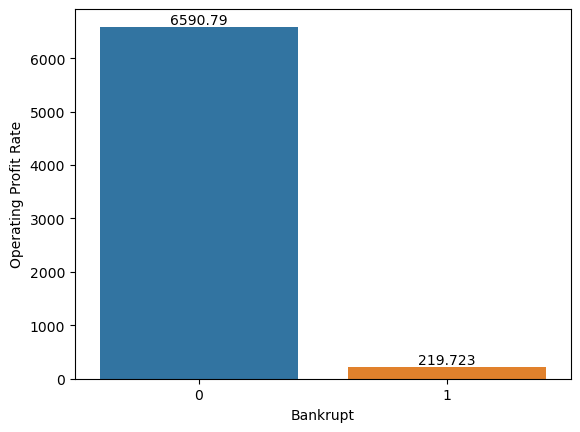

In [6]:
bank_data1=pd.DataFrame({"Bankrupt":[0,1],"Operating_Profit_Rate":(bank_data.groupby(["Bankrupt"]).sum())["Operating_Profit_Rate"]})
c=sn.barplot(x="Bankrupt",y="Operating_Profit_Rate",data=bank_data1)
for container in c.containers:
    c.bar_label(container)
c.set(xlabel="Bankrupt",ylabel="Operating Profit Rate")
plt.show()

## Observation 2 : 
The Operating Profit Rate for Bankrupt companies is 219.723 and the Operating Profit Rate for Non-Bankrupt companies is 6590.79

## Question 3 : 
Plot a bar graph to show how many companies are bankrupt or not (already asked in first ques).

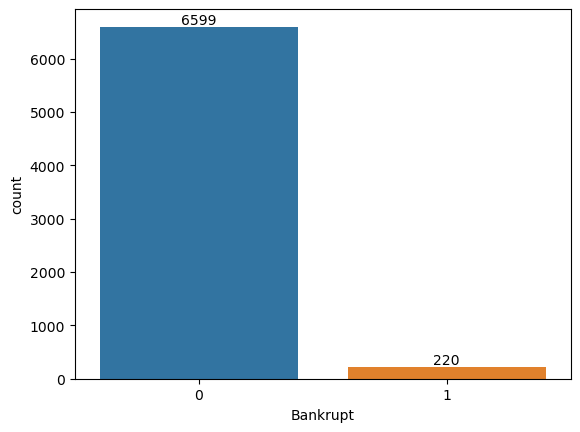

In [7]:
count=sn.countplot(x=bank_data['Bankrupt'])
for container in count.containers:
    count.bar_label(container)

## Observation 3 :
6599 companies are bankrupt and 220 companies are not bankrupt.

## Question 4 : 
Plot a countplot for Liability Assets Flag (use Bankrupt column for colour encoding).

In [8]:
bank_data.rename(columns = {" Liability-Assets Flag": "Liability_Assets_Flag"}, inplace = True)

[Text(0.5, 0, 'Liability-Assets Flag')]

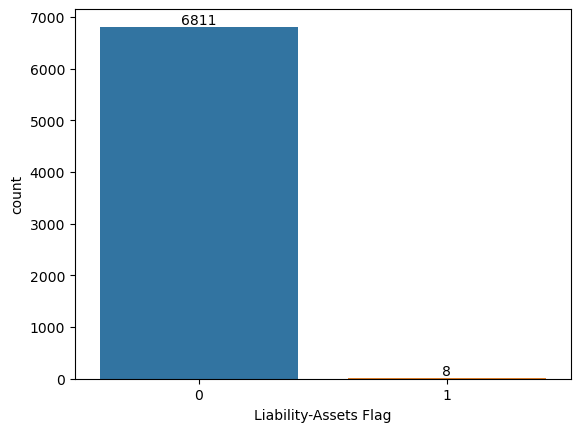

In [9]:
count_=sn.countplot(x=bank_data['Liability_Assets_Flag'])
for container in count_.containers:
    count_.bar_label(container)
count_.set(xlabel="Liability-Assets Flag")

## Observation 4 : 
6811 companies have Liability-Assets Flas as 0 and 8 companies have Liability-Assets Flag as 1.

## Question 5 : 
Plot a heatmap without using the bankrupt column (using the seaborn library).

In [10]:
bank_data2=bank_data.iloc[:, 1:96]

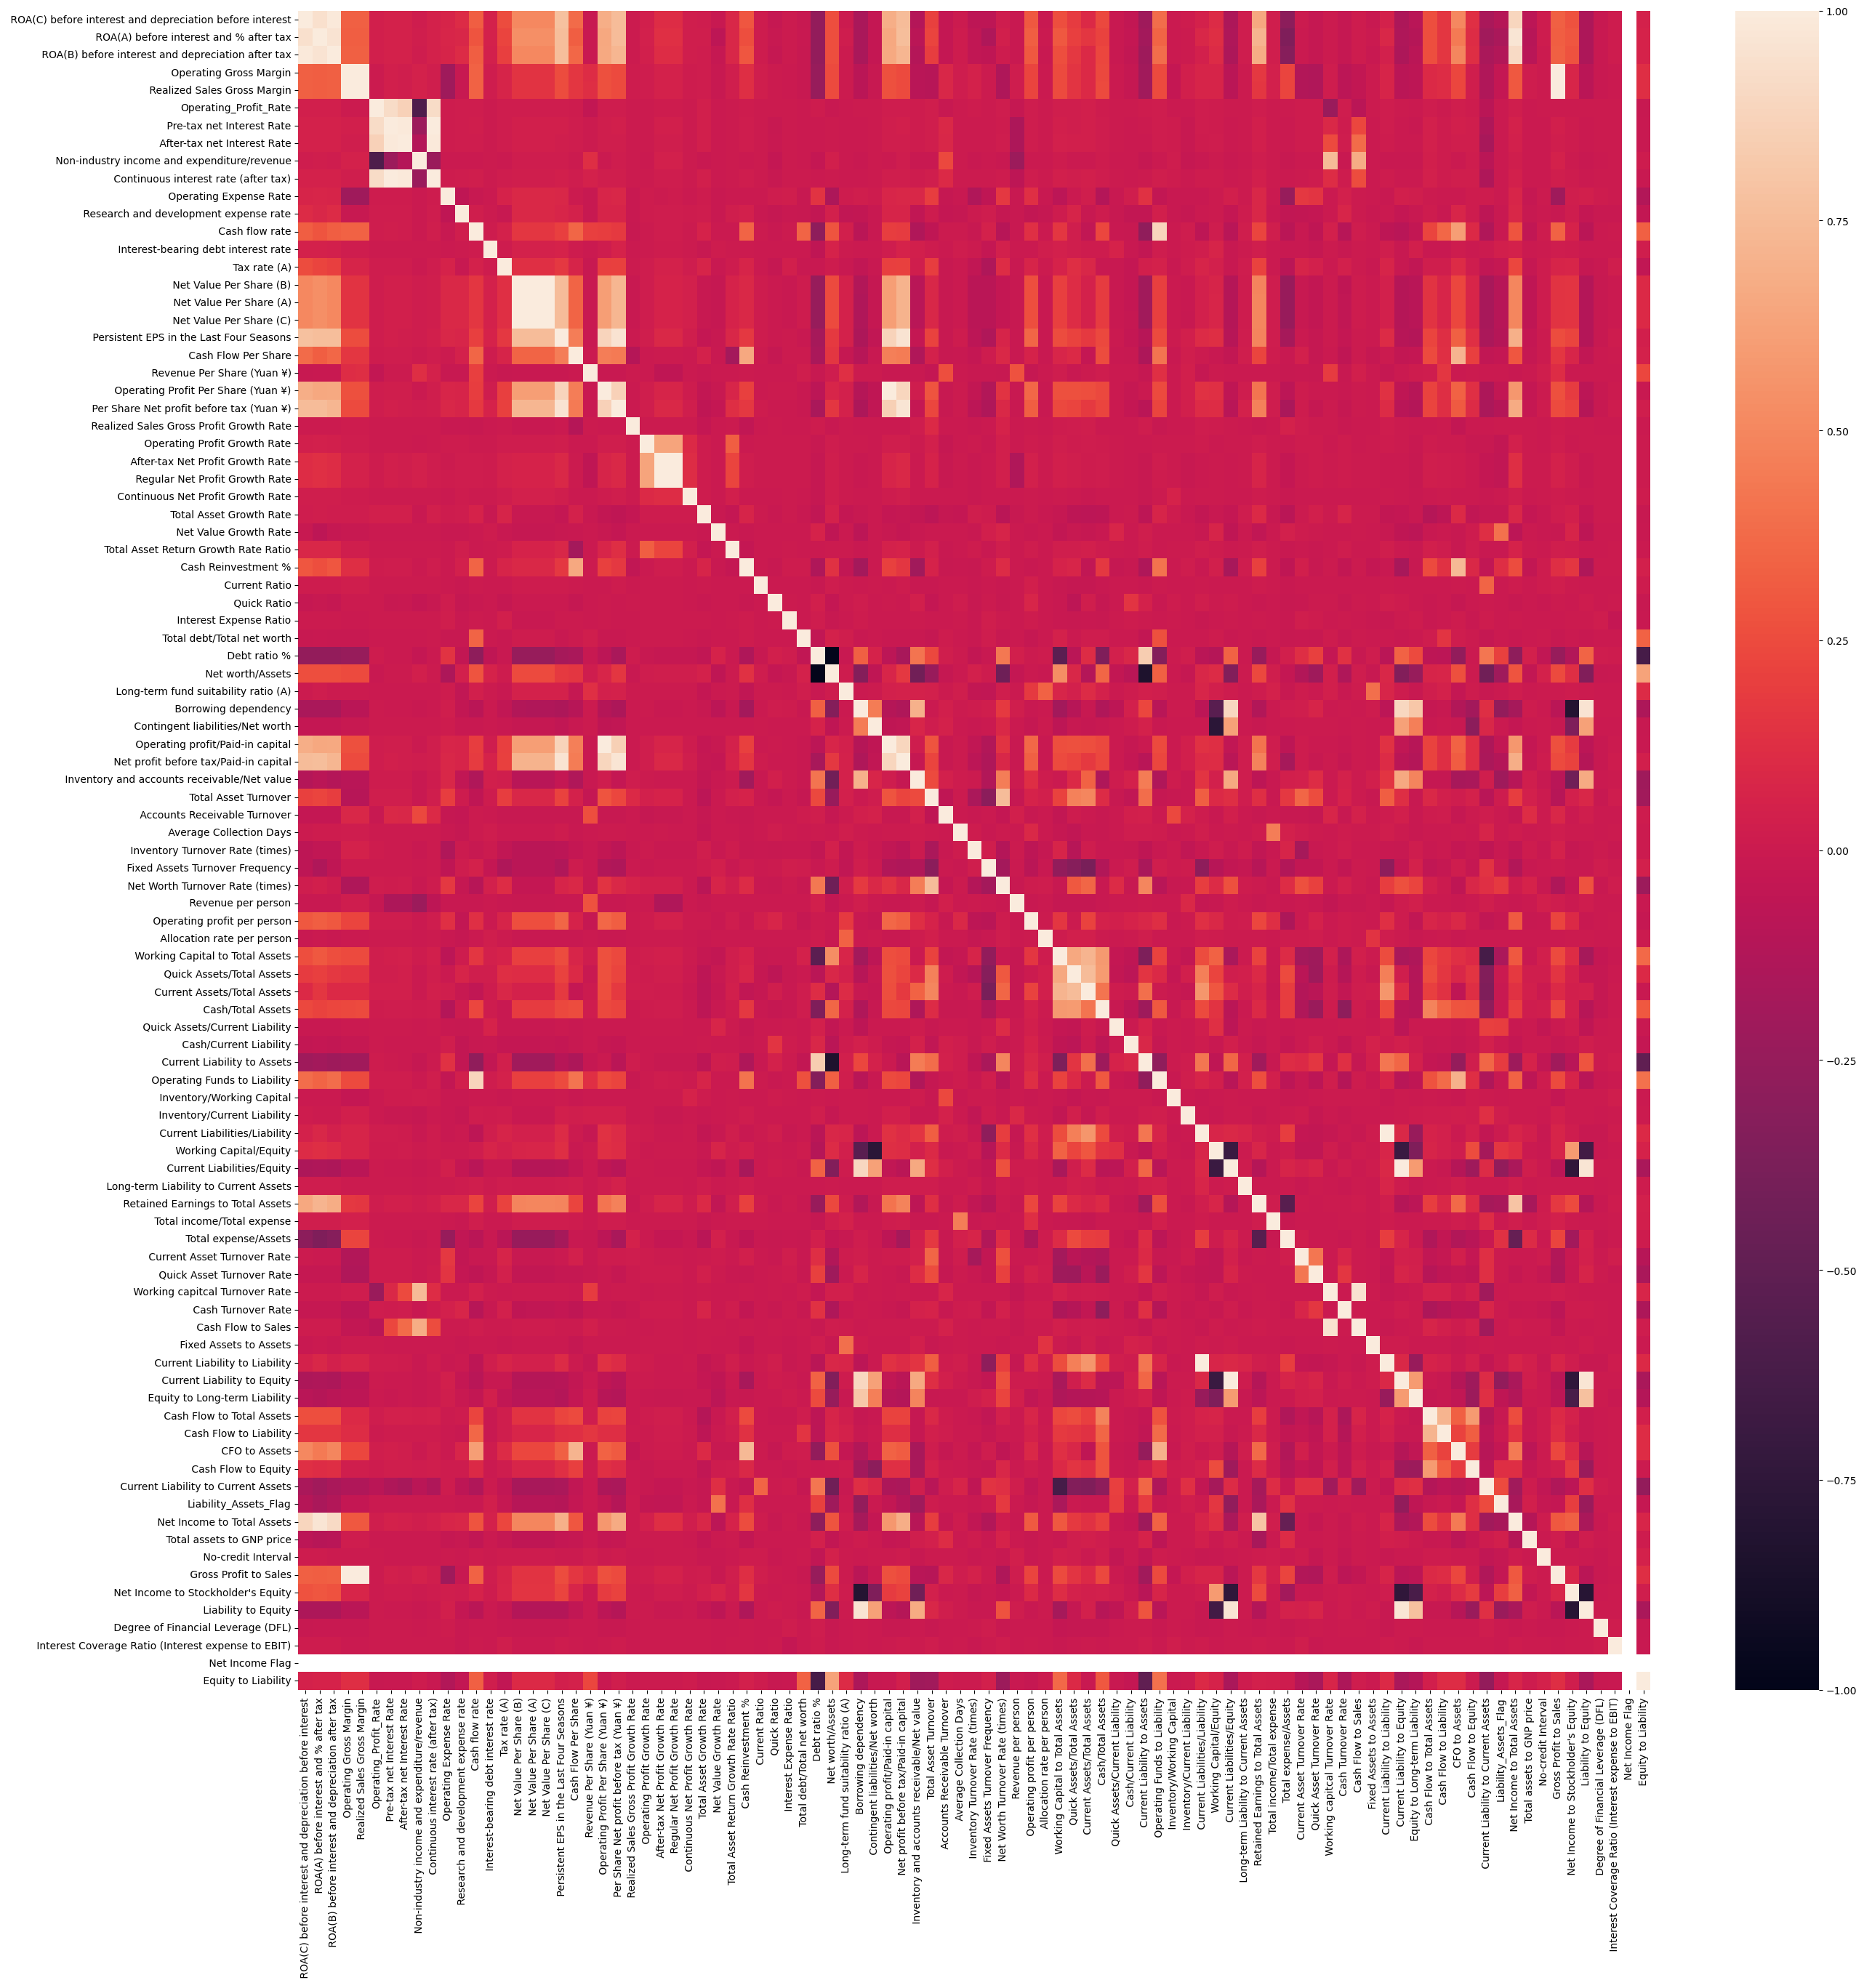

In [11]:
plt.subplots(figsize=(30,30))
dataplot = sn.heatmap(bank_data2.corr())
plt.show()

## Observation 5 :
The plot for heatmap(excluding the "bankrupt?" column) is shown above.

# ________________________________________________________________

## TASK 2 - Classification / Regression

### Perform following steps on the same dataset which you used for EDA.
- Data Preprocessing (as per requirement)
- Feature Engineering
- Split dataset in train-test (80:20 ratio)
- Model selection
- Model training
- Model evaluation
- Fine-tune the Model
- Make predictions
### Summarize your model's performance by evaluation metrices.

### Data Preprocessing (as per requirement)

In [12]:
from sklearn import preprocessing

In [13]:
LE= preprocessing.LabelEncoder()

In [14]:
x=bank_data.drop(columns=['Bankrupt'])  #input
x.head()

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating_Profit_Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,0.780284,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,0.781241,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,0.781550,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [15]:
y=bank_data[["Bankrupt"]]  #output
y.head()

,Bankrupt
0,1
1,1
2,1
3,1
4,1


### Feature Engineering

In [16]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt                                                  6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6   Operating_Profit_Rate                                     6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

Since there are no null values in the dataset, so no feature engineering is required.

### Split dataset in train-test (80:20 ratio)

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train,x_test,y_train,y_test = train_test_split( x, y, test_size=0.2,random_state=42) 

### Model selection

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
model = LogisticRegression()

### Model training

In [21]:
model.fit(x_train,y_train)

LogisticRegression()

### Model evaluation

In [22]:
model.score(x_train,y_train)

0.9677360219981668

In [23]:
model.score(x_test,y_test)

0.9611436950146628

### Fine-tune the Model

Since the accuracy of the model is near to 1 (0.952 for testing data and 0.961 for training data) hence the Logistic Regression Model is the best suited for this dataset.

### Predictions

In [24]:
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

## Summary 
In this dataset ( Company Bankruptcy Pediction), the task was to perfom classification of records into the mentioned classes that are Bankrupt or Non-Bankrupt.
I have used Logistic Regression Model for classification purpose, were in I found that the accuracy of the model is 0.96 ( using score() function).